In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('data_4.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   algorithm             150 non-null    object 
 1   file_name             150 non-null    object 
 2   number_of_nodes       150 non-null    int64  
 3   number_of_leaf_nodes  150 non-null    int64  
 4   time_taken            150 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ KB


In [62]:
df.number_of_nodes.value_counts()

number_of_nodes
100    42
10     12
20     12
30     12
40     12
50     12
60     12
70     12
80     12
90     12
Name: count, dtype: int64

In [63]:
df.algorithm.value_counts()

algorithm
2_Approximation        50
Priority-BFS           50
Simulated_Annealing    50
Name: count, dtype: int64

In [64]:
scale_free_df = df[df.file_name.str.startswith('scale')]
random_df = df[df.file_name.str.startswith('random_graph')]
complete_df = df[df.file_name.str.startswith('complete')]
incomplete_df = df[df.file_name.str.startswith('incomplete')]
d_regular = df[df.file_name.str.startswith('random_d')]

In [65]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 30 to 139
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   algorithm             30 non-null     object 
 1   file_name             30 non-null     object 
 2   number_of_nodes       30 non-null     int64  
 3   number_of_leaf_nodes  30 non-null     int64  
 4   time_taken            30 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


Text(0.5, 1.0, 'Number of Nodes and Number of Leaf Nodes for random graph')

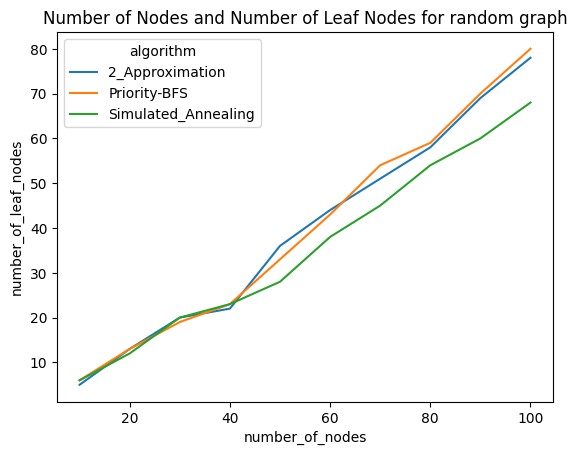

In [66]:
sns.lineplot(data=random_df, x='number_of_nodes', y='number_of_leaf_nodes', hue='algorithm')
plt.title('Number of Nodes and Number of Leaf Nodes for random graph')

Text(0.5, 1.0, 'Number of Nodes and Number of Leaf Nodes for complete grid graph')

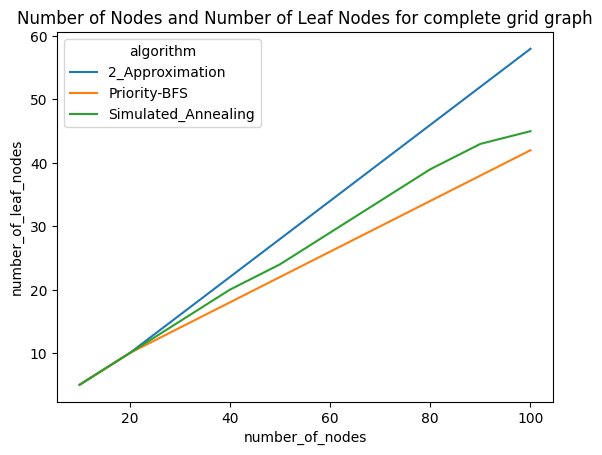

In [67]:
sns.lineplot(data=complete_df, x='number_of_nodes', y='number_of_leaf_nodes', hue='algorithm')
plt.title('Number of Nodes and Number of Leaf Nodes for complete grid graph')

Text(0.5, 1.0, 'Number of Nodes and Number of Leaf Nodes for incomplete grid graph')

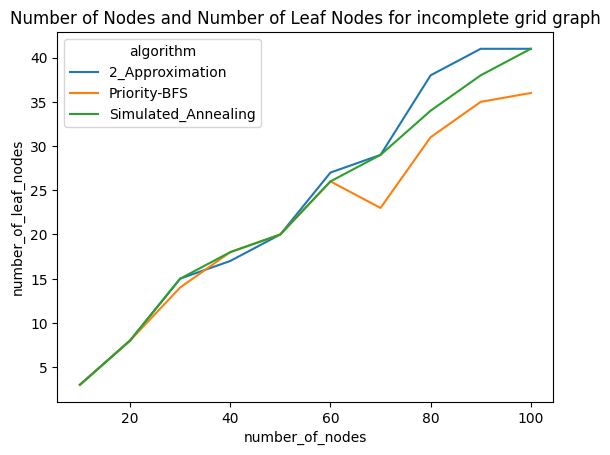

In [68]:
sns.lineplot(data=incomplete_df, x='number_of_nodes', y='number_of_leaf_nodes', hue='algorithm')
plt.title('Number of Nodes and Number of Leaf Nodes for incomplete grid graph')

Text(0.5, 1.0, 'Number of Nodes and Number of Leaf Nodes for d-regular graph')

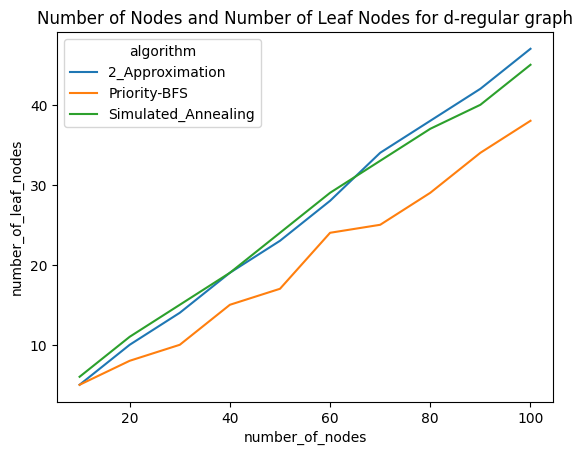

In [69]:
sns.lineplot(data=d_regular, x='number_of_nodes', y='number_of_leaf_nodes', hue='algorithm')
plt.title('Number of Nodes and Number of Leaf Nodes for d-regular graph')

In [70]:
pivot_df = scale_free_df.pivot_table(index='algorithm', values='number_of_leaf_nodes', aggfunc='mean')

In [71]:
pivot_df

,number_of_leaf_nodes
algorithm,
2_Approximation,71.4
Priority-BFS,70.5
Simulated_Annealing,73.7


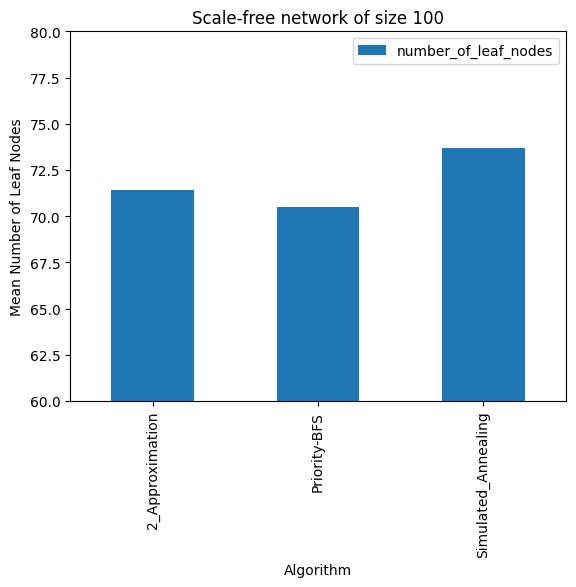

In [85]:
ax = pivot_df.plot(kind='bar')
plt.xlabel('Algorithm')
plt.ylabel('Mean Number of Leaf Nodes')
plt.title('Scale-free network of size 100')
ax.set_ylim(60, 80)
plt.show()